In [13]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import mne

In [14]:
# Built in montages 
# if you’re working with EEG data exclusively, you’ll want to use Montages, not layouts.

builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

In [18]:
# Loading the built-in EEG montages

standard_1005_montage = mne.channels.make_standard_montage("standard_1005")
print(standard_1005_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 343 channels>


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 339 unique labels.


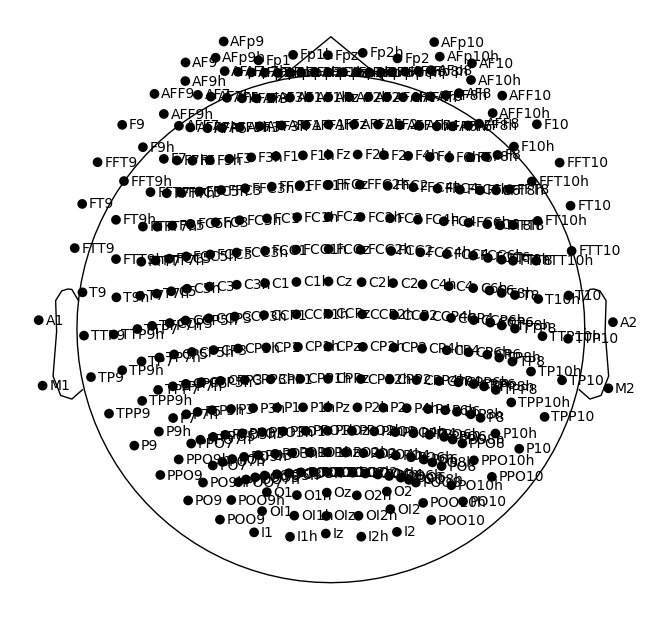

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 339 unique labels.


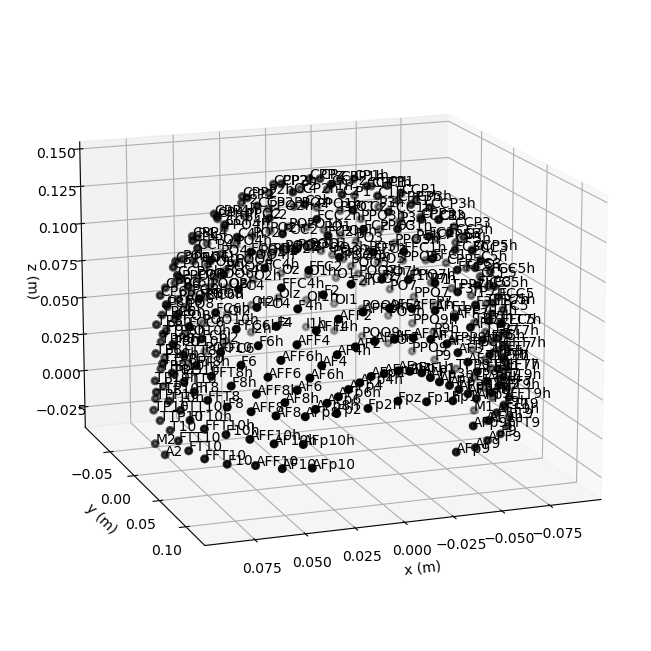

In [20]:
# visualizing the sensor locations in 2D or 3D
standard_1005_montage.plot()  # 2D
fig = standard_1005_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

In [17]:
# Path to local file
file_path = "C:\\Users\\sonam\\University of Canberra\\4th Semester\\Capstone\\dataset\\eeg_raw_fif\\cz_eeg1_raw.fif"

# Read the raw EEG data
cz_eeg1_raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\sonam\University of Canberra\4th Semester\Capstone\dataset\eeg_raw_fif\cz_eeg1_raw.fif...
Isotrak not found
    Range : 0 ... 33600 =      0.000 ...    33.600 secs
Ready.
Reading 0 ... 33600  =      0.000 ...    33.600 secs...


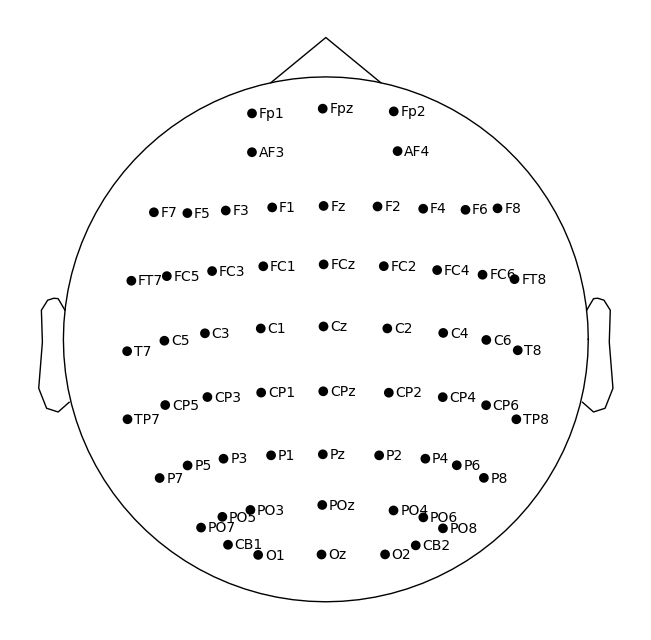

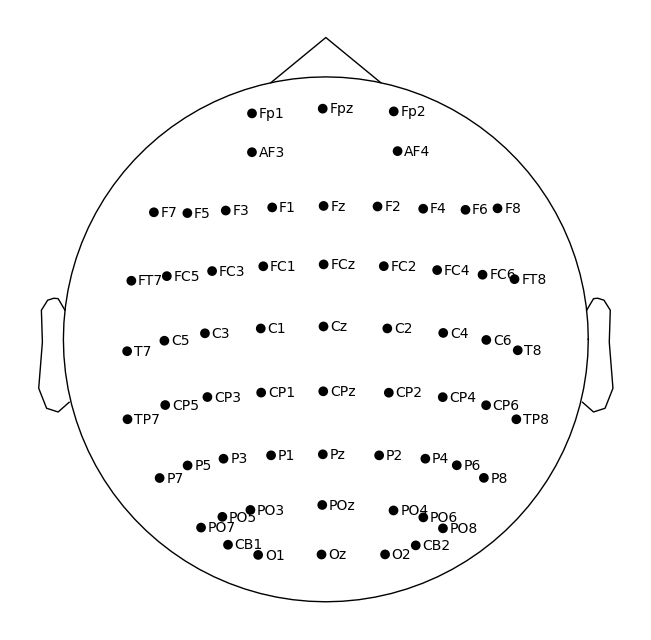

In [51]:
from mne.datasets import eegbci

#channels = ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2']

# set channel names
eegbci.standardize(cz_eeg1_raw)

# set montage to standard_1005 which contains all the channels names 
montage = mne.channels.make_standard_montage('standard_1005')

# match_case=False to avoid casing error in channel names
# match_alias = True because CB1 alias is P008 and CB2 alias is P009
cz_eeg1_raw.set_montage(montage, match_case=False, match_alias=True)

# Plot the channels 
cz_eeg1_raw.plot_sensors(ch_type="eeg", show_names= True, sphere=(0.0, 0.02, 0.01, 0.099))